<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week37.do.txt --no_mako -->
<!-- dom:TITLE: Week 37: Gradient descent methods -->

# Week 37: Gradient descent methods
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo, Norway

Date: **September 8-12, 2025**

<!-- todo add link to videos and add link to Van Wieringens notes -->

## Plans for week 37, lecture Monday

**Plans and material  for the lecture on Monday September 8.**

The family of gradient descent methods
1. Plain gradient descent (constant learning rate), reminder from last week with examples using OLS and Ridge

2. Improving gradient descent with momentum

3. Introducing stochastic gradient descent

4. More advanced updates of the learning rate: ADAgrad, RMSprop and ADAM
<!-- * [Video of Lecture](https://youtu.be/omLmp_kkie0) -->
<!-- * [Whiteboard notes](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2024/NotesSeptember9.pdf) -->

## Readings and Videos:
1. Recommended: Goodfellow et al, Deep Learning, introduction to gradient descent, see sections 4.3-4.5  at <https://www.deeplearningbook.org/contents/numerical.html> and chapter 8.3-8.5 at <https://www.deeplearningbook.org/contents/optimization.html>

2. Rashcka et al, pages 37-44 and pages 278-283 with focus on linear regression.

3. Video on gradient descent at <https://www.youtube.com/watch?v=sDv4f4s2SB8>

4. Video on Stochastic gradient descent at <https://www.youtube.com/watch?v=vMh0zPT0tLI>

## Material for lecture Monday September 8

## Gradient descent and revisiting Ordinary Least Squares from last week

Last week we started with  linear regression as a case study for the gradient descent
methods. Linear regression is a great test case for the gradient
descent methods discussed in the lectures since it has several
desirable properties such as:

1. An analytical solution (recall homework sets for week 35).

2. The gradient can be computed analytically.

3. The cost function is convex which guarantees that gradient descent converges for small enough learning rates

We revisit an example similar to what we had in the first homework set. We have a function  of the type

In [1]:
import numpy as np
x = 2*np.random.rand(m,1)
y = 4+3*x+np.random.randn(m,1)

with $x_i \in [0,1] $ is chosen randomly using a uniform distribution. Additionally we have a stochastic noise chosen according to a normal distribution $\cal {N}(0,1)$. 
The linear regression model is given by

$$
h_\theta(x) = \boldsymbol{y} = \theta_0 + \theta_1 x,
$$

such that

$$
\boldsymbol{y}_i = \theta_0 + \theta_1 x_i.
$$

## Gradient descent example

Let $\mathbf{y} = (y_1,\cdots,y_n)^T$, $\mathbf{\boldsymbol{y}} = (\boldsymbol{y}_1,\cdots,\boldsymbol{y}_n)^T$ and $\theta = (\theta_0, \theta_1)^T$

It is convenient to write $\mathbf{\boldsymbol{y}} = X\theta$ where $X \in \mathbb{R}^{100 \times 2} $ is the design matrix given by (we keep the intercept here)

$$
X \equiv \begin{bmatrix}
1 & x_1  \\
\vdots & \vdots  \\
1 & x_{100} &  \\
\end{bmatrix}.
$$

The cost/loss/risk function is given by

$$
C(\theta) = \frac{1}{n}||X\theta-\mathbf{y}||_{2}^{2} = \frac{1}{n}\sum_{i=1}^{100}\left[ (\theta_0 + \theta_1 x_i)^2 - 2 y_i (\theta_0 + \theta_1 x_i) + y_i^2\right]
$$

and we want to find $\theta$ such that $C(\theta)$ is minimized.

## The derivative of the cost/loss function

Computing $\partial C(\theta) / \partial \theta_0$ and $\partial C(\theta) / \partial \theta_1$ we can show  that the gradient can be written as

$$
\nabla_{\theta} C(\theta) = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\theta_0+\theta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\theta_0+\theta_1x_i)-y_ix_i\right) \\
\end{bmatrix} = \frac{2}{n}X^T(X\theta - \mathbf{y}),
$$

where $X$ is the design matrix defined above.

## The Hessian matrix
The Hessian matrix of $C(\theta)$ is given by

$$
\boldsymbol{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\theta)}{\partial \theta_0^2} & \frac{\partial^2 C(\theta)}{\partial \theta_0 \partial \theta_1}  \\
\frac{\partial^2 C(\theta)}{\partial \theta_0 \partial \theta_1} & \frac{\partial^2 C(\theta)}{\partial \theta_1^2} &  \\
\end{bmatrix} = \frac{2}{n}X^T X.
$$

This result implies that $C(\theta)$ is a convex function since the matrix $X^T X$ always is positive semi-definite.

## Simple program

We can now write a program that minimizes $C(\theta)$ using the gradient descent method with a constant learning rate $\eta$ according to

$$
\theta_{k+1} = \theta_k - \eta \nabla_\theta C(\theta_k), \ k=0,1,\cdots
$$

We can use the expression we computed for the gradient and let use a
$\theta_0$ be chosen randomly and let $\eta = 0.001$. Stop iterating
when $||\nabla_\theta C(\theta_k) || \leq \epsilon = 10^{-8}$. **Note that the code below does not include the latter stop criterion**.

And finally we can compare our solution for $\theta$ with the analytic result given by 
$\theta= (X^TX)^{-1} X^T \mathbf{y}$.

## Gradient Descent Example

Here our simple example

Eigenvalues of Hessian Matrix:[0.29918563 4.58469793]
[[4.04503963]
 [2.96930082]]
[[-3.92478381e+176]
 [-4.83829315e+176]]


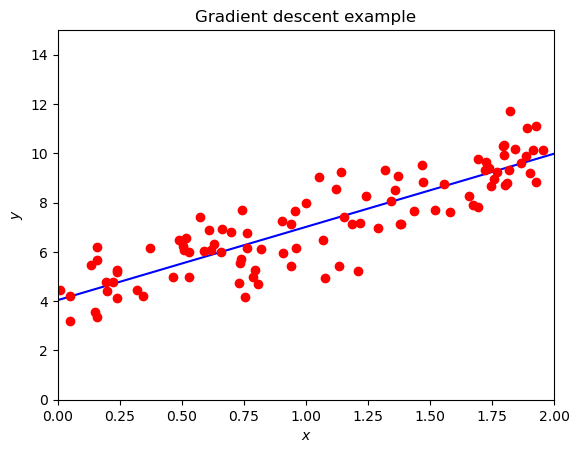

In [3]:
%matplotlib inline


# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta_linreg)
theta = np.random.randn(2,1)

eta = 2.5/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ theta-y)
    theta -= eta*gradient

print(theta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(theta)
ypredict2 = xbnew.dot(theta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

## Gradient descent and Ridge

We have also discussed Ridge regression where the loss function contains a regularized term given by the $L_2$ norm of $\theta$,

$$
C_{\text{ridge}}(\theta) = \frac{1}{n}||X\theta -\mathbf{y}||^2 + \lambda ||\theta||^2, \ \lambda \geq 0.
$$

In order to minimize $C_{\text{ridge}}(\theta)$ using GD we adjust the gradient as follows

$$
\nabla_\theta C_{\text{ridge}}(\theta)  = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\theta_0+\theta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\theta_0+\theta_1x_i)-y_ix_i\right) \\
\end{bmatrix} + 2\lambda\begin{bmatrix} \theta_0 \\ \theta_1\end{bmatrix} = 2 (\frac{1}{n}X^T(X\theta - \mathbf{y})+\lambda \theta).
$$

We can easily extend our program to minimize $C_{\text{ridge}}(\theta)$ using gradient descent and compare with the analytical solution given by

$$
\theta_{\text{ridge}} = \left(X^T X + n\lambda I_{2 \times 2} \right)^{-1} X^T \mathbf{y}.
$$

## The Hessian matrix for Ridge Regression
The Hessian matrix of Ridge Regression for our simple example  is given by

$$
\boldsymbol{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\theta)}{\partial \theta_0^2} & \frac{\partial^2 C(\theta)}{\partial \theta_0 \partial \theta_1}  \\
\frac{\partial^2 C(\theta)}{\partial \theta_0 \partial \theta_1} & \frac{\partial^2 C(\theta)}{\partial \theta_1^2} &  \\
\end{bmatrix} = \frac{2}{n}X^T X+2\lambda\boldsymbol{I}.
$$

This implies that the Hessian matrix  is positive definite, hence the stationary point is a
minimum.
Note that the Ridge cost function is convex being  a sum of two convex
functions. Therefore, the stationary point is a global
minimum of this function.

## Program example for gradient descent with Ridge Regression

Eigenvalues of Hessian Matrix:[0.28267705 4.52578812]
[[4.39166208]
 [2.57978284]]
[[4.38905562]
 [2.58193415]]


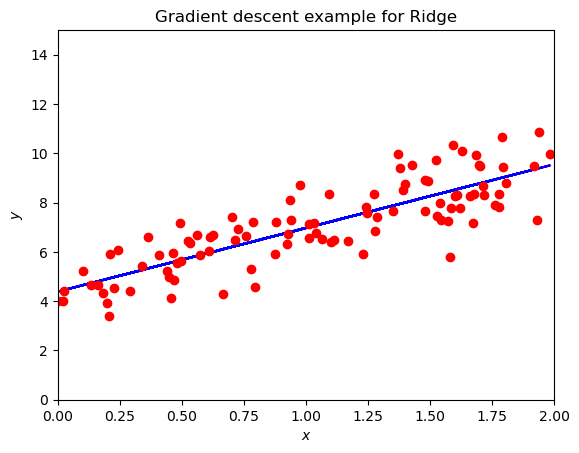

In [4]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X

#Ridge parameter lambda
lmbda  = 0.001
Id = n*lmbda* np.eye(XT_X.shape[0])

# Hessian matrix
H = (2.0/n)* XT_X+2*lmbda* np.eye(XT_X.shape[0])
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")


theta_linreg = np.linalg.inv(XT_X+Id) @ X.T @ y
print(theta_linreg)
# Start plain gradient descent
theta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 100

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ (theta)-y)+2*lmbda*theta
    theta -= eta*gradients

print(theta)
ypredict = X @ theta
ypredict2 = X @ theta_linreg
plt.plot(x, ypredict, "r-")
plt.plot(x, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example for Ridge')
plt.show()

## Using gradient descent methods, limitations

* **Gradient descent (GD) finds local minima of our function**. Since the GD algorithm is deterministic, if it converges, it will converge to a local minimum of our cost/loss/risk function. Because in ML we are often dealing with extremely rugged landscapes with many local minima, this can lead to poor performance.

* **GD is sensitive to initial conditions**. One consequence of the local nature of GD is that initial conditions matter. Depending on where one starts, one will end up at a different local minima. Therefore, it is very important to think about how one initializes the training process. This is true for GD as well as more complicated variants of GD.

* **Gradients are computationally expensive to calculate for large datasets**. In many cases in statistics and ML, the cost/loss/risk function is a sum of terms, with one term for each data point. For example, in linear regression, $E \propto \sum_{i=1}^n (y_i - \mathbf{w}^T\cdot\mathbf{x}_i)^2$; for logistic regression, the square error is replaced by the cross entropy. To calculate the gradient we have to sum over *all* $n$ data points. Doing this at every GD step becomes extremely computationally expensive. An ingenious solution to this, is to calculate the gradients using small subsets of the data called "mini batches". This has the added benefit of introducing stochasticity into our algorithm.

* **GD is very sensitive to choices of learning rates**. GD is extremely sensitive to the choice of learning rates. If the learning rate is very small, the training process take an extremely long time. For larger learning rates, GD can diverge and give poor results. Furthermore, depending on what the local landscape looks like, we have to modify the learning rates to ensure convergence. Ideally, we would *adaptively* choose the learning rates to match the landscape.

* **GD treats all directions in parameter space uniformly.** Another major drawback of GD is that unlike Newton's method, the learning rate for GD is the same in all directions in parameter space. For this reason, the maximum learning rate is set by the behavior of the steepest direction and this can significantly slow down training. Ideally, we would like to take large steps in flat directions and small steps in steep directions. Since we are exploring rugged landscapes where curvatures change, this requires us to keep track of not only the gradient but second derivatives. The ideal scenario would be to calculate the Hessian but this proves to be too computationally expensive. 

* GD can take exponential time to escape saddle points, even with random initialization. As we mentioned, GD is extremely sensitive to initial condition since it determines the particular local minimum GD would eventually reach. However, even with a good initialization scheme, through the introduction of randomness, GD can still take exponential time to escape saddle points.

## Momentum based GD

We discuss here some simple examples where we introduce what is called
'memory'about previous steps, or what is normally called momentum
gradient descent.
For the mathematical details, see whiteboad notes from lecture on September 8, 2025.

## Improving gradient descent with momentum

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


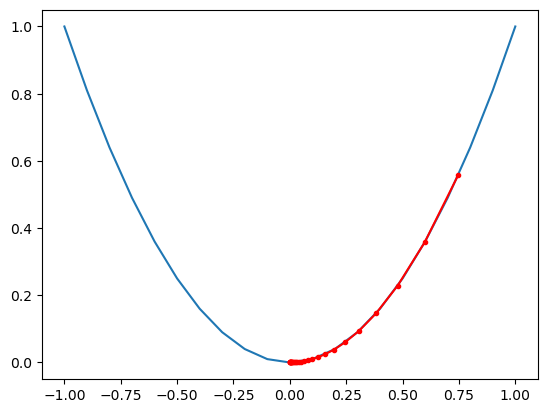

In [5]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Same code but now with momentum gradient descent

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


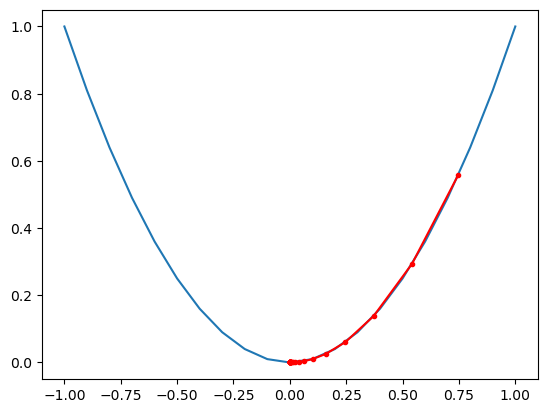

In [6]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Overview video on Stochastic Gradient Descent (SGD)

[What is Stochastic Gradient Descent](https://www.youtube.com/watch?v=vMh0zPT0tLI&ab_channel=StatQuestwithJoshStarmer)
There are several reasons for using stochastic gradient descent. Some of these are:

1. Efficiency: Updates weights more frequently using a single or a small batch of samples, which speeds up convergence.

2. Hopefully avoid Local Minima

3. Memory Usage: Requires less memory compared to computing gradients for the entire dataset.

## Batches and mini-batches

In gradient descent we compute the cost function and its gradient for all data points we have.

In large-scale applications such as the [ILSVRC challenge](https://www.image-net.org/challenges/LSVRC/), the
training data can have on order of millions of examples. Hence, it
seems wasteful to compute the full cost function over the entire
training set in order to perform only a single parameter update. A
very common approach to addressing this challenge is to compute the
gradient over batches of the training data. For example, a typical batch could contain some thousand  examples from
an  entire training set of several millions. This batch is then used to
perform a parameter update.

## Pros and cons

1. Speed: SGD is faster than gradient descent because it uses only one training example per iteration, whereas gradient descent requires the entire dataset. This speed advantage becomes more significant as the size of the dataset increases.

2. Convergence: Gradient descent has a more predictable convergence behaviour because it uses the average gradient of the entire dataset. In contrast, SGD’s convergence behaviour can be more erratic due to its random sampling of individual training examples.

3. Memory: Gradient descent requires more memory than SGD because it must store the entire dataset for each iteration. SGD only needs to store the current training example, making it more memory-efficient.

## Convergence rates

1. Stochastic Gradient Descent has a faster convergence rate due to the use of single training examples in each iteration.

2. Gradient Descent as a slower convergence rate, as it uses the entire dataset for each iteration.

## Accuracy

In general, stochastic Gradient Descent is Less accurate than gradient
descent, as it calculates the gradient on single examples, which may
not accurately represent the overall dataset.  Gradient Descent is
more accurate because it uses the average gradient calculated over the
entire dataset.

There are other disadvantages to using SGD. The main drawback is that
its convergence behaviour can be more erratic due to the random
sampling of individual training examples. This can lead to less
accurate results, as the algorithm may not converge to the true
minimum of the cost function. Additionally, the learning rate, which
determines the step size of each update to the model’s parameters,
must be carefully chosen to ensure convergence.

It is however the method of choice in deep learning algorithms where
SGD is often used in combination with other optimization techniques,
such as momentum or adaptive learning rates

## Stochastic Gradient Descent (SGD)

In stochastic gradient descent, the extreme case is the case where we
have only one batch, that is we include the whole data set.

This process is called Stochastic Gradient
Descent (SGD) (or also sometimes on-line gradient descent). This is
relatively less common to see because in practice due to vectorized
code optimizations it can be computationally much more efficient to
evaluate the gradient for 100 examples, than the gradient for one
example 100 times. Even though SGD technically refers to using a
single example at a time to evaluate the gradient, you will hear
people use the term SGD even when referring to mini-batch gradient
descent (i.e. mentions of MGD for “Minibatch Gradient Descent”, or BGD
for “Batch gradient descent” are rare to see), where it is usually
assumed that mini-batches are used. The size of the mini-batch is a
hyperparameter but it is not very common to cross-validate or bootstrap it. It is
usually based on memory constraints (if any), or set to some value,
e.g. 32, 64 or 128. We use powers of 2 in practice because many
vectorized operation implementations work faster when their inputs are
sized in powers of 2.

In our notes with  SGD we mean stochastic gradient descent with mini-batches.

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) and variants thereof address some of
the shortcomings of the Gradient descent method discussed above.

The underlying idea of SGD comes from the observation that the cost
function, which we want to minimize, can almost always be written as a
sum over $n$ data points $\{\mathbf{x}_i\}_{i=1}^n$,

$$
C(\mathbf{\theta}) = \sum_{i=1}^n c_i(\mathbf{x}_i,
\mathbf{\theta}).
$$

## Computation of gradients

This in turn means that the gradient can be
computed as a sum over $i$-gradients

$$
\nabla_\theta C(\mathbf{\theta}) = \sum_i^n \nabla_\theta c_i(\mathbf{x}_i,
\mathbf{\theta}).
$$

Stochasticity/randomness is introduced by only taking the
gradient on a subset of the data called minibatches.  If there are $n$
data points and the size of each minibatch is $M$, there will be $n/M$
minibatches. We denote these minibatches by $B_k$ where
$k=1,\cdots,n/M$.

## SGD example
As an example, suppose we have $10$ data points $(\mathbf{x}_1,\cdots, \mathbf{x}_{10})$ 
and we choose to have $M=5$ minibathces,
then each minibatch contains two data points. In particular we have
$B_1 = (\mathbf{x}_1,\mathbf{x}_2), \cdots, B_5 =
(\mathbf{x}_9,\mathbf{x}_{10})$. Note that if you choose $M=1$ you
have only a single batch with all data points and on the other extreme,
you may choose $M=n$ resulting in a minibatch for each datapoint, i.e
$B_k = \mathbf{x}_k$.

The idea is now to approximate the gradient by replacing the sum over
all data points with a sum over the data points in one the minibatches
picked at random in each gradient descent step

$$
\nabla_{\theta}
C(\mathbf{\theta}) = \sum_{i=1}^n \nabla_\theta c_i(\mathbf{x}_i,
\mathbf{\theta}) \rightarrow \sum_{i \in B_k}^n \nabla_\theta
c_i(\mathbf{x}_i, \mathbf{\theta}).
$$

## The gradient step

Thus a gradient descent step now looks like

$$
\theta_{j+1} = \theta_j - \eta_j \sum_{i \in B_k}^n \nabla_\theta c_i(\mathbf{x}_i,
\mathbf{\theta})
$$

where $k$ is picked at random with equal
probability from $[1,n/M]$. An iteration over the number of
minibathces (n/M) is commonly referred to as an epoch. Thus it is
typical to choose a number of epochs and for each epoch iterate over
the number of minibatches, as exemplified in the code below.

## Simple example code

In [6]:
import numpy as np 

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

Taking the gradient only on a subset of the data has two important
benefits. First, it introduces randomness which decreases the chance
that our opmization scheme gets stuck in a local minima. Second, if
the size of the minibatches are small relative to the number of
datapoints ($M <  n$), the computation of the gradient is much
cheaper since we sum over the datapoints in the $k-th$ minibatch and not
all $n$ datapoints.

## When do we stop?

A natural question is when do we stop the search for a new minimum?
One possibility is to compute the full gradient after a given number
of epochs and check if the norm of the gradient is smaller than some
threshold and stop if true. However, the condition that the gradient
is zero is valid also for local minima, so this would only tell us
that we are close to a local/global minimum. However, we could also
evaluate the cost function at this point, store the result and
continue the search. If the test kicks in at a later stage we can
compare the values of the cost function and keep the $\theta$ that
gave the lowest value.

## Slightly different approach

Another approach is to let the step length $\eta_j$ depend on the
number of epochs in such a way that it becomes very small after a
reasonable time such that we do not move at all. Such approaches are
also called scaling. There are many such ways to [scale the learning
rate](https://towardsdatascience.com/gradient-descent-the-learning-rate-and-the-importance-of-feature-scaling-6c0b416596e1)
and [discussions here](https://www.jmlr.org/papers/volume23/20-1258/20-1258.pdf). See
also
<https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1>
for a discussion of different scaling functions for the learning rate.

## Time decay rate

As an example, let $e = 0,1,2,3,\cdots$ denote the current epoch and let $t_0, t_1 > 0$ be two fixed numbers. Furthermore, let $t = e \cdot m + i$ where $m$ is the number of minibatches and $i=0,\cdots,m-1$. Then the function $$\eta_j(t; t_0, t_1) = \frac{t_0}{t+t_1} $$ goes to zero as the number of epochs gets large. I.e. we start with a step length $\eta_j (0; t_0, t_1) = t_0/t_1$ which decays in *time* $t$.

In this way we can fix the number of epochs, compute $\theta$ and
evaluate the cost function at the end. Repeating the computation will
give a different result since the scheme is random by design. Then we
pick the final $\theta$ that gives the lowest value of the cost
function.

In [7]:
import numpy as np 

def step_length(t,t0,t1):
    return t0/(t+t1)

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 500 #number of epochs
t0 = 1.0
t1 = 10

eta_j = t0/t1
j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for theta
        t = epoch*m+i
        eta_j = step_length(t,t0,t1)
        j += 1

print("eta_j after %d epochs: %g" % (n_epochs,eta_j))

## Code with a Number of Minibatches which varies

In the code here we vary the number of mini-batches.

Own inversion
[[4.08805934]
 [2.86802426]]
Eigenvalues of Hessian Matrix:[0.26504701 4.42519896]
theta from own gd
[[4.08805934]
 [2.86802426]]
theta from own sdg
[[4.10653666]
 [2.86499207]]


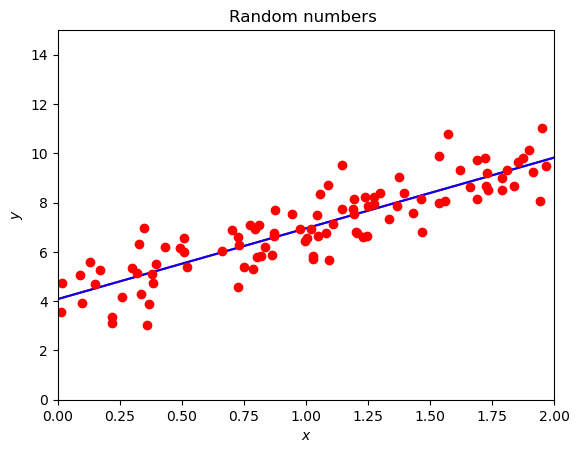

In [7]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Replace or not

In the above code, we have use replacement in setting up the
mini-batches. The discussion
[here](https://sebastianraschka.com/faq/docs/sgd-methods.html) may be
useful.

## SGD vs Full-Batch GD: Convergence Speed and Memory Comparison

### Theoretical Convergence Speed and convex optimization

Consider minimizing an empirical cost function

$$
C(\theta) =\frac{1}{N}\sum_{i=1}^N l_i(\theta),
$$

where each $l_i(\theta)$ is a
differentiable loss term. Gradient Descent (GD) updates parameters
using the full gradient $\nabla C(\theta)$, while Stochastic Gradient
Descent (SGD) uses a single sample (or mini-batch) gradient $\nabla
l_i(\theta)$ selected at random. In equation form, one GD step is:

$$
\theta_{t+1} = \theta_t-\eta \nabla C(\theta_t) =\theta_t -\eta \frac{1}{N}\sum_{i=1}^N \nabla l_i(\theta_t),
$$

whereas one SGD step is:

$$
\theta_{t+1} = \theta_t -\eta \nabla l_{i_t}(\theta_t),
$$

with $i_t$ randomly chosen. On smooth convex problems, GD and SGD both
converge to the global minimum, but their rates differ. GD can take
larger, more stable steps since it uses the exact gradient, achieving
an error that decreases on the order of $O(1/t)$ per iteration for
convex objectives (and even exponentially fast for strongly convex
cases). In contrast, plain SGD has more variance in each step, leading
to sublinear convergence in expectation – typically $O(1/\sqrt{t})$
for general convex objectives (\thetaith appropriate diminishing step
sizes) . Intuitively, GD’s trajectory is smoother and more
predictable, while SGD’s path oscillates due to noise but costs far
less per iteration, enabling many more updates in the same time.

### Strongly Convex Case

If $C(\theta)$ is strongly convex and $L$-smooth (so GD enjoys linear
convergence), the gap $C(\theta_t)-C(\theta^*)$ for GD shrinks as

$$
C(\theta_t) - C(\theta^* ) \le \Big(1 - \frac{\mu}{L}\Big)^t [C(\theta_0)-C(\theta^*)],
$$

a geometric (linear) convergence per iteration . Achieving an
$\epsilon$-accurate solution thus takes on the order of
$\log(1/\epsilon)$ iterations for GD. However, each GD iteration costs
$O(N)$ gradient evaluations. SGD cannot exploit strong convexity to
obtain a linear rate – instead, with a properly decaying step size
(e.g. $\eta_t = \frac{1}{\mu t}$) or iterate averaging, SGD attains an
$O(1/t)$ convergence rate in expectation . For example, one result
of Moulines and  Bach 2011, see <https://papers.nips.cc/paper_files/paper/2011/hash/40008b9a5380fcacce3976bf7c08af5b-Abstract.html> shows that with $\eta_t = \Theta(1/t)$,

$$
\mathbb{E}[C(\theta_t) - C(\theta^*)] = O(1/t),
$$

for strongly convex, smooth $F$ . This $1/t$ rate is slower per
iteration than GD’s exponential decay, but each SGD iteration is $N$
times cheaper. In fact, to reach error $\epsilon$, plain SGD needs on
the order of $T=O(1/\epsilon)$ iterations (sub-linear convergence),
while GD needs $O(\log(1/\epsilon))$ iterations. When accounting for
cost-per-iteration, GD requires $O(N \log(1/\epsilon))$ total gradient
computations versus SGD’s $O(1/\epsilon)$ single-sample
computations. In large-scale regimes (huge $N$), SGD can be
faster in wall-clock time because $N \log(1/\epsilon)$ may far exceed
$1/\epsilon$ for reasonable accuracy levels. In other words,
with millions of data points, one epoch of GD (one full gradient) is
extremely costly, whereas SGD can make $N$ cheap updates in the time
GD makes one – often yielding a good solution faster in practice, even
though SGD’s asymptotic error decays more slowly. As one lecture
succinctly puts it: “SGD can be super effective in terms of iteration
cost and memory, but SGD is slow to converge and can’t adapt to strong
convexity” . Thus, the break-even point depends on $N$ and the desired
accuracy: for moderate accuracy on very large $N$, SGD’s cheaper
updates win; for extremely high precision (very small $\epsilon$) on a
modest $N$, GD’s fast convergence per step can be advantageous.

### Non-Convex Problems

In non-convex optimization (e.g. deep neural networks), neither GD nor
SGD guarantees global minima, but SGD often displays faster progress
in finding useful minima. Theoretical results here are weaker, usually
showing convergence to a stationary point $\theta$ ($|\nabla C|$ is
small) in expectation. For example, GD might require $O(1/\epsilon^2)$
iterations to ensure $|\nabla C(\theta)| < \epsilon$, and SGD typically has
similar polynomial complexity (often worse due to gradient
noise). However, a noteworthy difference is that SGD’s stochasticity
can help escape saddle points or poor local minima. Random gradient
fluctuations act like implicit noise, helping the iterate “jump” out
of flat saddle regions where full-batch GD could stagnate . In fact,
research has shown that adding noise to GD can guarantee escaping
saddle points in polynomial time, and the inherent noise in SGD often
serves this role. Empirically, this means SGD can sometimes find a
lower loss basin faster, whereas full-batch GD might get “stuck” near
saddle points or need a very small learning rate to navigate complex
error surfaces . Overall, in modern high-dimensional machine learning,
SGD (or mini-batch SGD) is the workhorse for large non-convex problems
because it converges to good solutions much faster in practice,
despite the lack of a linear convergence guarantee. Full-batch GD is
rarely used on large neural networks, as it would require tiny steps
to avoid divergence and is extremely slow per iteration .

## Memory Usage and Scalability

A major advantage of SGD is its memory efficiency in handling large
datasets. Full-batch GD requires access to the entire training set for
each iteration, which often means the whole dataset (or a large
subset) must reside in memory to compute $\nabla C(\theta)$ . This results
in memory usage that scales linearly with the dataset size $N$. For
instance, if each training sample is large (e.g. high-dimensional
features), computing a full gradient may require storing a substantial
portion of the data or all intermediate gradients until they are
aggregated. In contrast, SGD needs only a single (or a small
mini-batch of) training example(s) in memory at any time . The
algorithm processes one sample (or mini-batch) at a time and
immediately updates the model, discarding that sample before moving to
the next. This streaming approach means that memory footprint is
essentially independent of $N$ (apart from storing the model
parameters themselves). As one source notes, gradient descent
“requires more memory than SGD” because it “must store the entire
dataset for each iteration,” whereas SGD “only needs to store the
current training example” . In practical terms, if you have a dataset
of size, say, 1 million examples, full-batch GD would need memory for
all million every step, while SGD could be implemented to load just
one example at a time – a crucial benefit if data are too large to fit
in RAM or GPU memory. This scalability makes SGD suitable for
large-scale learning: as long as you can stream data from disk, SGD
can handle arbitrarily large datasets with fixed memory. In fact, SGD
“does not need to remember which examples were visited” in the past,
allowing it to run in an online fashion on infinite data streams
. Full-batch GD, on the other hand, would require multiple passes
through a giant dataset per update (or a complex distributed memory
system), which is often infeasible.

There is also a secondary memory effect: computing a full-batch
gradient in deep learning requires storing all intermediate
activations for backpropagation across the entire batch. A very large
batch (approaching the full dataset) might exhaust GPU memory due to
the need to hold activation gradients for thousands or millions of
examples simultaneously. SGD/minibatches mitigate this by splitting
the workload – e.g. with a mini-batch of size 32 or 256, memory use
stays bounded, whereas a full-batch (size = $N$) forward/backward pass
could not even be executed if $N$ is huge. Techniques like gradient
accumulation exist to simulate large-batch GD by summing many
small-batch gradients – but these still process data in manageable
chunks to avoid memory overflow. In summary, memory complexity for GD
grows with $N$, while for SGD it remains $O(1)$ w.r.t. dataset size
(only the model and perhaps a mini-batch reside in memory) . This is a
key reason why batch GD “does not scale” to very large data and why
virtually all large-scale machine learning algorithms rely on
stochastic or mini-batch methods.

## Empirical Evidence: Convergence Time and Memory in Practice

Empirical studies strongly support the theoretical trade-offs
above. In large-scale machine learning tasks, SGD often converges to a
good solution much faster in wall-clock time than full-batch GD, and
it uses far less memory. For example, Bottou & Bousquet (2008)
analyzed learning time under a fixed computational budget and
concluded that when data is abundant, it’s better to use a faster
(even if less precise) optimization method to process more examples in
the same time . This analysis showed that for large-scale problems,
processing more data with SGD yields lower error than spending the
time to do exact (batch) optimization on fewer data . In other words,
if you have a time budget, it’s often optimal to accept slightly
slower convergence per step (as with SGD) in exchange for being able
to use many more training samples in that time. This phenomenon is
borne out by experiments:

### Deep Neural Networks

In modern deep learning, full-batch GD is so slow that it is rarely
attempted; instead, mini-batch SGD is standard. A recent study
demonstrated that it is possible to train a ResNet-50 on ImageNet
using full-batch gradient descent, but it required careful tuning
(e.g. gradient clipping, tiny learning rates) and vast computational
resources – and even then, each full-batch update was extremely
expensive.

Using a huge batch
(closer to full GD) tends to slow down convergence if the learning
rate is not scaled up, and often encounters optimization difficulties
(plateaus) that small batches avoid.
Empirically, small or medium
batch SGD finds minima in fewer clock hours because it can rapidly
loop over the data with gradient noise aiding exploration.

### Memory constraints

From a memory standpoint, practitioners note that batch GD becomes
infeasible on large data. For example, if one tried to do full-batch
training on a dataset that doesn’t fit in RAM or GPU memory, the
program would resort to heavy disk I/O or simply crash. SGD
circumvents this by processing mini-batches. Even in cases where data
does fit in memory, using a full batch can spike memory usage due to
storing all gradients. One empirical observation is that mini-batch
training has a “lower, fluctuating usage pattern” of memory, whereas
full-batch loading “quickly consumes memory (often exceeding limits)”
. This is especially relevant for graph neural networks or other
models where a “batch” may include a huge chunk of a graph: full-batch
gradient computation can exhaust GPU memory, whereas mini-batch
methods keep memory usage manageable .

In summary, SGD converges faster than full-batch GD in terms of actual
training time for large-scale problems, provided we measure
convergence as reaching a good-enough solution. Theoretical bounds
show SGD needs more iterations, but because it performs many more
updates per unit time (and requires far less memory), it often
achieves lower loss in a given time frame than GD. Full-batch GD might
take slightly fewer iterations in theory, but each iteration is so
costly that it is “slower… especially for large datasets” . Meanwhile,
memory scaling strongly favors SGD: GD’s memory cost grows with
dataset size, making it impractical beyond a point, whereas SGD’s
memory use is modest and mostly constant w.r.t. $N$ . These
differences have made SGD (and mini-batch variants) the de facto
choice for training large machine learning models, from logistic
regression on millions of examples to deep neural networks with
billions of parameters. The consensus in both research and practice is
that for large-scale or high-dimensional tasks, SGD-type methods
converge quicker per unit of computation and handle memory constraints
better than standard full-batch gradient descent .

## Second moment of the gradient

In stochastic gradient descent, with and without momentum, we still
have to specify a schedule for tuning the learning rates $\eta_t$
as a function of time.  As discussed in the context of Newton's
method, this presents a number of dilemmas. The learning rate is
limited by the steepest direction which can change depending on the
current position in the landscape. To circumvent this problem, ideally
our algorithm would keep track of curvature and take large steps in
shallow, flat directions and small steps in steep, narrow directions.
Second-order methods accomplish this by calculating or approximating
the Hessian and normalizing the learning rate by the
curvature. However, this is very computationally expensive for
extremely large models. Ideally, we would like to be able to
adaptively change the step size to match the landscape without paying
the steep computational price of calculating or approximating
Hessians.

During the last decade a number of methods have been introduced that accomplish
this by tracking not only the gradient, but also the second moment of
the gradient. These methods include AdaGrad, AdaDelta, Root Mean Squared Propagation (RMS-Prop), and
[ADAM](https://arxiv.org/abs/1412.6980).

## Challenge: Choosing a Fixed Learning Rate
A fixed $\eta$ is hard to get right:
1. If $\eta$ is too large, the updates can overshoot the minimum, causing oscillations or divergence

2. If $\eta$ is too small, convergence is very slow (many iterations to make progress)

In practice, one often uses trial-and-error or schedules (decaying $\eta$ over time) to find a workable balance.
For a function with steep directions and flat directions, a single global $\eta$ may be inappropriate:
1. Steep coordinates require a smaller step size to avoid oscillation.

2. Flat/shallow coordinates could use a larger step to speed up progress.

3. This issue is pronounced in high-dimensional problems with **sparse or varying-scale features** – we need a method to adjust step sizesper feature.

## Motivation for Adaptive Step Sizes

1. Instead of a fixed global $\eta$, use an **adaptive learning rate** for each parameter that depends on the history of gradients.

2. Parameters that have large accumulated gradient magnitude should get smaller steps (they've been changing a lot), whereas parameters with small or infrequent gradients can have larger relative steps.

3. This is especially useful for sparse features: Rarely active features accumulate little gradient, so their learning rate remains comparatively high, ensuring they are not neglected

4. Conversely, frequently active features accumulate large gradient sums, and their learning rate automatically decreases, preventing too-large updates

5. Several algorithms implement this idea (AdaGrad, RMSProp, AdaDelta, Adam, etc.). We will derive **AdaGrad**, one of the first adaptive methods.

## AdaGrad algorithm, taken from [Goodfellow et al](https://www.deeplearningbook.org/contents/optimization.html)

<!-- dom:FIGURE: [figures/adagrad.png, width=600 frac=0.8] -->
<!-- begin figure -->

<img src="figures/adagrad.png" width="600"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Derivation of the AdaGrad Algorithm

**Accumulating Gradient History.**

1. AdaGrad maintains a running sum of squared gradients for each parameter (coordinate)

2. Let $g_t = \nabla C_{i_t}(x_t)$ be the gradient at step $t$ (or a subgradient for nondifferentiable cases).

3. Initialize $r_0 = 0$ (an all-zero vector in $\mathbb{R}^d$).

4. At each iteration $t$, update the accumulation:

$$
r_t = r_{t-1} + g_t \circ g_t,
$$

1. Here  $g_t \circ g_t$ denotes element-wise square of the gradient vector. $g_t^{(j)} = g_{t-1}^{(j)} + (g_{t,j})^2$ for each parameter $j$.

2. We can view $H_t = \mathrm{diag}(r_t)$ as a diagonal matrix of past squared gradients. Initially $H_0 = 0$.

## AdaGrad Update Rule Derivation

We scale the gradient by the inverse square root of the accumulated matrix $H_t$. The AdaGrad update at step $t$ is:

$$
\theta_{t+1} =\theta_t - \eta H_t^{-1/2} g_t,
$$

where $H_t^{-1/2}$ is the diagonal matrix with entries $(r_{t}^{(1)})^{-1/2}, \dots, (r_{t}^{(d)})^{-1/2}$
In coordinates, this means each parameter $j$ has an individual step size:

$$
\theta_{t+1,j} =\theta_{t,j} -\frac{\eta}{\sqrt{r_{t,j}}}g_{t,j}.
$$

In practice we add a small constant $\epsilon$ in the denominator for numerical stability to avoid division by zero:

$$
\theta_{t+1,j}= \theta_{t,j}-\frac{\eta}{\sqrt{\epsilon + r_{t,j}}}g_{t,j}.
$$

Equivalently, the effective learning rate for parameter $j$ at time $t$ is $\displaystyle \alpha_{t,j} = \frac{\eta}{\sqrt{\epsilon + r_{t,j}}}$. This decreases over time as $r_{t,j}$ grows.

## AdaGrad Properties

1. AdaGrad automatically tunes the step size for each parameter. Parameters with more *volatile or large gradients* get smaller steps, and those with *small or infrequent gradients* get relatively larger steps

2. No manual schedule needed: The accumulation $r_t$ keeps increasing (or stays the same if gradient is zero), so step sizes $\eta/\sqrt{r_t}$ are non-increasing. This has a similar effect to a learning rate schedule, but individualized per coordinate.

3. Sparse data benefit: For very sparse features, $r_{t,j}$ grows slowly, so that feature’s parameter retains a higher learning rate for longer, allowing it to make significant updates when it does get a gradient signal

4. Convergence: In convex optimization, AdaGrad can be shown to achieve a sub-linear convergence rate  comparable to the best fixed learning rate tuned for the problem

It effectively reduces the need to tune $\eta$ by hand.
1. Limitations: Because $r_t$ accumulates without bound, AdaGrad’s learning rates can become extremely small over long training, potentially slowing progress. (Later variants like RMSProp, AdaDelta, Adam address this by modifying the accumulation rule.)

## RMSProp: Adaptive Learning Rates

Addresses AdaGrad’s diminishing learning rate issue.
Uses a decaying average of squared gradients (instead of a cumulative sum):

$$
v_t = \rho v_{t-1} + (1-\rho)(\nabla C(\theta_t))^2,
$$

with $\rho$ typically $0.9$ (or $0.99$).
1. Update: $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{v_t + \epsilon}} \nabla C(\theta_t)$.

2. Recent gradients have more weight, so $v_t$ adapts to the current landscape.

3. Avoids AdaGrad’s “infinite memory” problem – learning rate does not continuously decay to zero.

RMSProp was first proposed in lecture notes by Geoff Hinton, 2012 - unpublished.)

## RMSProp algorithm, taken from [Goodfellow et al](https://www.deeplearningbook.org/contents/optimization.html)

<!-- dom:FIGURE: [figures/rmsprop.png, width=600 frac=0.8] -->
<!-- begin figure -->

<img src="figures/rmsprop.png" width="600"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Adam Optimizer

Why combine Momentum and RMSProp? Motivation for Adam: Adaptive Moment Estimation (Adam) was introduced by Kingma an Ba (2014) to combine the benefits of momentum and RMSProp.

1. Fast convergence by smoothing gradients (accelerates in long-term gradient direction).

2. Adaptive rates (RMSProp): Per-dimension learning rate scaling for stability (handles different feature scales, sparse gradients).

3. Adam uses both: maintains moving averages of both first moment (gradients) and second moment (squared gradients)

4. Additionally, includes a mechanism to correct the bias in these moving averages (crucial in early iterations)

**Result**: Adam is robust, achieves faster convergence with less tuning, and often outperforms SGD (with momentum) in practice.

## [ADAM optimizer](https://arxiv.org/abs/1412.6980)

In [ADAM](https://arxiv.org/abs/1412.6980), we keep a running average of
both the first and second moment of the gradient and use this
information to adaptively change the learning rate for different
parameters.  The method is efficient when working with large
problems involving lots data and/or parameters.  It is a combination of the
gradient descent with momentum algorithm and the RMSprop algorithm
discussed above.

## Why Combine Momentum and RMSProp?

1. Momentum: Fast convergence by smoothing gradients (accelerates in long-term gradient direction).

2. Adaptive rates (RMSProp): Per-dimension learning rate scaling for stability (handles different feature scales, sparse gradients).

3. Adam uses both: maintains moving averages of both first moment (gradients) and second moment (squared gradients)

4. Additionally, includes a mechanism to correct the bias in these moving averages (crucial in early iterations)

Result: Adam is robust, achieves faster convergence with less tuning, and often outperforms SGD (with momentum) in practice

## Adam: Exponential Moving Averages (Moments)
Adam maintains two moving averages at each time step $t$ for each parameter $w$:
**First moment (mean) $m_t$.**

The Momentum term

$$
m_t = \beta_1m_{t-1} + (1-\beta_1)\, \nabla C(\theta_t),
$$

**Second moment (uncentered variance) $v_t$.**

The RMS term

$$
v_t = \beta_2v_{t-1} + (1-\beta_2)(\nabla C(\theta_t))^2,
$$

with typical $\beta_1 = 0.9$, $\beta_2 = 0.999$. Initialize $m_0 = 0$, $v_0 = 0$.

  These are **biased** estimators of the true first and second moment of the gradients, especially at the start (since $m_0,v_0$ are zero)

## Adam: Bias Correction
To counteract initialization bias in $m_t, v_t$, Adam computes bias-corrected estimates

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \qquad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}.
$$

* When $t$ is small, $1-\beta_i^t \approx 0$, so $\hat{m}_t, \hat{v}_t$ significantly larger than raw $m_t, v_t$, compensating for the initial zero bias.

* As $t$ increases, $1-\beta_i^t \to 1$, and $\hat{m}_t, \hat{v}_t$ converge to $m_t, v_t$.

* Bias correction is important for Adam’s stability in early iterations

## Adam: Update Rule Derivation
Finally, Adam updates parameters using the bias-corrected moments:

$$
\theta_{t+1} =\theta_t -\frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon}\hat{m}_t,
$$

where $\epsilon$ is a small constant (e.g. $10^{-8}$) to prevent division by zero.
Breaking it down:
1. Compute gradient $\nabla C(\theta_t)$.

2. Update first moment $m_t$ and second moment $v_t$ (exponential moving averages).

3. Bias-correct: $\hat{m}_t = m_t/(1-\beta_1^t)$, $\; \hat{v}_t = v_t/(1-\beta_2^t)$.

4. Compute step: $\Delta \theta_t = \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$.

5. Update parameters: $\theta_{t+1} = \theta_t - \alpha\, \Delta \theta_t$.

This is the Adam update rule as given in the original paper.

## Adam vs. AdaGrad and RMSProp

1. AdaGrad: Uses per-coordinate scaling like Adam, but no momentum. Tends to slow down too much due to cumulative history (no forgetting)

2. RMSProp: Uses moving average of squared gradients (like Adam’s $v_t$) to maintain adaptive learning rates, but does not include momentum or bias-correction.

3. Adam: Effectively RMSProp + Momentum + Bias-correction

  * Momentum ($m_t$) provides acceleration and smoother convergence.

  * Adaptive $v_t$ scaling moderates the step size per dimension.

  * Bias correction (absent in AdaGrad/RMSProp) ensures robust estimates early on.

In practice, Adam often yields faster convergence and better tuning stability than RMSProp or AdaGrad alone

## Adaptivity Across Dimensions

1. Adam adapts the step size \emph{per coordinate}: parameters with larger gradient variance get smaller effective steps, those with smaller or sparse gradients get larger steps.

2. This per-dimension adaptivity is inherited from AdaGrad/RMSProp and helps handle ill-conditioned or sparse problems.

3. Meanwhile, momentum (first moment) allows Adam to continue making progress even if gradients become small or noisy, by leveraging accumulated direction.

## ADAM algorithm, taken from [Goodfellow et al](https://www.deeplearningbook.org/contents/optimization.html)

<!-- dom:FIGURE: [figures/adam.png, width=600 frac=0.8] -->
<!-- begin figure -->

<img src="figures/adam.png" width="600"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Algorithms and codes for Adagrad, RMSprop and Adam

The algorithms we have implemented are well described in the text by [Goodfellow, Bengio and Courville, chapter 8](https://www.deeplearningbook.org/contents/optimization.html).

The codes which implement these algorithms are discussed below here.

## Practical tips

* **Randomize the data when making mini-batches**. It is always important to randomly shuffle the data when forming mini-batches. Otherwise, the gradient descent method can fit spurious correlations resulting from the order in which data is presented.

* **Transform your inputs**. Learning becomes difficult when our landscape has a mixture of steep and flat directions. One simple trick for minimizing these situations is to standardize the data by subtracting the mean and normalizing the variance of input variables. Whenever possible, also decorrelate the inputs. To understand why this is helpful, consider the case of linear regression. It is easy to show that for the squared error cost function, the Hessian of the cost function is just the correlation matrix between the inputs. Thus, by standardizing the inputs, we are ensuring that the landscape looks homogeneous in all directions in parameter space. Since most deep networks can be viewed as linear transformations followed by a non-linearity at each layer, we expect this intuition to hold beyond the linear case.

* **Monitor the out-of-sample performance.** Always monitor the performance of your model on a validation set (a small portion of the training data that is held out of the training process to serve as a proxy for the test set. If the validation error starts increasing, then the model is beginning to overfit. Terminate the learning process. This *early stopping* significantly improves performance in many settings.

* **Adaptive optimization methods don't always have good generalization.** Recent studies have shown that adaptive methods such as ADAM, RMSPorp, and AdaGrad tend to have poor generalization compared to SGD or SGD with momentum, particularly in the high-dimensional limit (i.e. the number of parameters exceeds the number of data points). Although it is not clear at this stage why these methods perform so well in training deep neural networks, simpler procedures like properly-tuned SGD may work as well or better in these applications.

## Sneaking in automatic differentiation using Autograd

In the examples here we take the liberty of sneaking in automatic
differentiation (without having discussed the mathematics).  In
project 1 you will write the gradients as discussed above, that is
hard-coding the gradients.  By introducing automatic differentiation
via the library **autograd**, which is now replaced by **JAX**, we have
more flexibility in setting up alternative cost functions.

The
first example shows results with ordinary leats squares.

In [9]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(theta):
    return (1.0/n)*np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000
# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Same code but now with momentum gradient descent

In [10]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(theta):
    return (1.0/n)*np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x#+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 30

# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
    print(iter,gradients[0],gradients[1])
print("theta from own gd")
print(theta)

# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.3
for iter in range(Niterations):
    # calculate gradient
    gradients = training_gradient(theta)
    # calculate update
    new_change = eta*gradients+delta_momentum*change
    # take a step
    theta -= new_change
    # save the change
    change = new_change
    print(iter,gradients[0],gradients[1])
print("theta from own gd wth momentum")
print(theta)

## Including Stochastic Gradient Descent with Autograd

In this code we include the stochastic gradient descent approach
discussed above. Note here that we specify which argument we are
taking the derivative with respect to when using **autograd**.

In [11]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

## Same code but now with momentum gradient descent

In [12]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 100

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

change = 0.0
delta_momentum = 0.3

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        # calculate update
        new_change = eta*gradients+delta_momentum*change
        # take a step
        theta -= new_change
        # save the change
        change = new_change
print("theta from own sdg with momentum")
print(theta)

## But none of these can compete with Newton's method

Note that we here have introduced automatic differentiation

In [13]:
# Using Newton's method
from random import random, seed
import numpy as np
import autograd.numpy as np
from autograd import grad

def CostOLS(theta):
    return (1.0/n)*np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+5*x*x

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
# Note that here the Hessian does not depend on the parameters theta
invH = np.linalg.pinv(H)
theta = np.random.randn(3,1)
Niterations = 5
# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= invH @ gradients
    print(iter,gradients[0],gradients[1])
print("theta from own Newton code")
print(theta)

## Similar (second order function now) problem but now with AdaGrad

In [14]:
# Using Autograd to calculate gradients using AdaGrad and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        Giter += gradients*gradients
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update
print("theta from own AdaGrad")
print(theta)

Running this code we note an almost perfect agreement with the results from matrix inversion.

## RMSprop for adaptive learning rate with Stochastic Gradient Descent

In [15]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Accumulated gradient
	# Scaling with rho the new and the previous results
        Giter = (rho*Giter+(1-rho)*gradients*gradients)
	# Taking the diagonal only and inverting
        update = gradients*eta/(delta+np.sqrt(Giter))
	# Hadamard product
        theta -= update
print("theta from own RMSprop")
print(theta)

## And finally [ADAM](https://arxiv.org/pdf/1412.6980.pdf)

In [16]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameters theta1 and theta2, see https://arxiv.org/abs/1412.6980
theta1 = 0.9
theta2 = 0.999
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-7
iter = 0
for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    iter += 1
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        # Computing moments first
        first_moment = theta1*first_moment + (1-theta1)*gradients
        second_moment = theta2*second_moment+(1-theta2)*gradients*gradients
        first_term = first_moment/(1.0-theta1**iter)
        second_term = second_moment/(1.0-theta2**iter)
	# Scaling with rho the new and the previous results
        update = eta*first_term/(np.sqrt(second_term)+delta)
        theta -= update
print("theta from own ADAM")
print(theta)

## Material for the lab sessions

1. Exercise set for week 37 and reminder on scaling (from lab sessions of week 35)

2. Work on project 1
<!-- * [Video of exercise sessions week 37](https://youtu.be/bK4AEcTu-oM) -->

For more discussions of Ridge regression and calculation of averages, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

## Reminder on different scaling methods

Before fitting a regression model, it is good practice to normalize or
standardize the features. This ensures all features are on a
comparable scale, which is especially important when using
regularization. In the exercises this week we will perform standardization, scaling each
feature to have mean 0 and standard deviation 1.

Here we compute the mean and standard deviation of each column (feature) in our design/feature matrix $\boldsymbol{X}$.
Then we subtract the mean and divide by the standard deviation for each feature.

In the example here we
we will also center the target $\boldsymbol{y}$ to mean $0$. Centering $\boldsymbol{y}$
(and each feature) means the model does not require a separate intercept
term, the data is shifted such that the intercept is effectively 0
. (In practice, one could include an intercept in the model and not
penalize it, but here we simplify by centering.)
Choose $n=100$ data points and set up $\boldsymbol{x}, $\boldsymbol{y}$ and the design matrix $\boldsymbol{X}$.

In [17]:
# Standardize features (zero mean, unit variance for each feature)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
X_norm = (X - X_mean) / X_std

# Center the target to zero mean (optional, to simplify intercept handling)
y_mean = ?
y_centered = ?

Do we need to center the values of $y$?

After this preprocessing, each column of $\boldsymbol{X}_{\mathrm{norm}}$ has mean zero and standard deviation $1$
and $\boldsymbol{y}_{\mathrm{centered}}$ has mean 0. This can make the optimization landscape
nicer and ensures the regularization penalty $\lambda \sum_j
\theta_j^2$ in Ridge regression treats each coefficient fairly (since features are on the
same scale).

## Functionality in Scikit-Learn

**Scikit-Learn** has several functions which allow us to rescale the
data, normally resulting in much better results in terms of various
accuracy scores.  The **StandardScaler** function in **Scikit-Learn**
ensures that for each feature/predictor we study the mean value is
zero and the variance is one (every column in the design/feature
matrix).  This scaling has the drawback that it does not ensure that
we have a particular maximum or minimum in our data set. Another
function included in **Scikit-Learn** is the **MinMaxScaler** which
ensures that all features are exactly between $0$ and $1$. The

## More preprocessing

The **Normalizer** scales each data
point such that the feature vector has a euclidean length of one. In other words, it
projects a data point on the circle (or sphere in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of it’s length).
This normalization is often used when only the direction (or angle) of the data matters,
not the length of the feature vector.

The **RobustScaler** works similarly to the StandardScaler in that it
ensures statistical properties for each feature that guarantee that
they are on the same scale. However, the RobustScaler uses the median
and quartiles, instead of mean and variance. This makes the
RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called
outliers, and might often lead to trouble for other scaling
techniques.

## Frequently used scaling functions

Many features are often scaled using standardization to improve performance. In **Scikit-Learn** this is given by the **StandardScaler** function as discussed above. It is easy however to write your own. 
Mathematically, this involves subtracting the mean and divide by the standard deviation over the data set, for each feature:

$$
x_j^{(i)} \rightarrow \frac{x_j^{(i)} - \overline{x}_j}{\sigma(x_j)},
$$

where $\overline{x}_j$ and $\sigma(x_j)$ are the mean and standard deviation, respectively,  of the feature $x_j$.
This ensures that each feature has zero mean and unit standard deviation.  For data sets where  we do not have the standard deviation or don't wish to calculate it,  it is then common to simply set it to one.

Keep in mind that when you transform your data set before training a model, the same transformation needs to be done
on your eventual new data set  before making a prediction. If we translate this into a Python code, it would could be implemented as

In [18]:
"""
#Model training, we compute the mean value of y and X
y_train_mean = np.mean(y_train)
X_train_mean = np.mean(X_train,axis=0)
X_train = X_train - X_train_mean
y_train = y_train - y_train_mean

# The we fit our model with the training data
trained_model = some_model.fit(X_train,y_train)


#Model prediction, we need also to transform our data set used for the prediction.
X_test = X_test - X_train_mean #Use mean from training data
y_pred = trained_model(X_test)
y_pred = y_pred + y_train_mean
"""

Let us try to understand what this may imply mathematically when we
subtract the mean values, also known as *zero centering*. For
simplicity, we will focus on  ordinary regression, as done in the above example.

The cost/loss function  for regression is

$$
C(\theta_0, \theta_1, ... , \theta_{p-1}) = \frac{1}{n}\sum_{i=0}^{n} \left(y_i - \theta_0 - \sum_{j=1}^{p-1} X_{ij}\theta_j\right)^2,.
$$

Recall also that we use the squared value. This expression can lead to an
increased penalty for higher differences between predicted and
output/target values.

What we have done is to single out the $\theta_0$ term in the
definition of the mean squared error (MSE).  The design matrix $X$
does in this case not contain any intercept column.  When we take the
derivative with respect to $\theta_0$, we want the derivative to obey

$$
\frac{\partial C}{\partial \theta_j} = 0,
$$

for all $j$. For $\theta_0$ we have

$$
\frac{\partial C}{\partial \theta_0} = -\frac{2}{n}\sum_{i=0}^{n-1} \left(y_i - \theta_0 - \sum_{j=1}^{p-1} X_{ij} \theta_j\right).
$$

Multiplying away the constant $2/n$, we obtain

$$
\sum_{i=0}^{n-1} \theta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} \sum_{j=1}^{p-1} X_{ij} \theta_j.
$$

Let us specialize first to the case where we have only two parameters $\theta_0$ and $\theta_1$.
Our result for $\theta_0$ simplifies then to

$$
n\theta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} X_{i1} \theta_1.
$$

We obtain then

$$
\theta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \theta_1\frac{1}{n}\sum_{i=0}^{n-1} X_{i1}.
$$

If we define

$$
\mu_{\boldsymbol{x}_1}=\frac{1}{n}\sum_{i=0}^{n-1} X_{i1},
$$

and the mean value of the outputs as

$$
\mu_y=\frac{1}{n}\sum_{i=0}^{n-1}y_i,
$$

we have

$$
\theta_0 = \mu_y - \theta_1\mu_{\boldsymbol{x}_1}.
$$

In the general case with more parameters than $\theta_0$ and $\theta_1$, we have

$$
\theta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \frac{1}{n}\sum_{i=0}^{n-1}\sum_{j=1}^{p-1} X_{ij}\theta_j.
$$

We can rewrite the latter equation as

$$
\theta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \sum_{j=1}^{p-1} \mu_{\boldsymbol{x}_j}\theta_j,
$$

where we have defined

$$
\mu_{\boldsymbol{x}_j}=\frac{1}{n}\sum_{i=0}^{n-1} X_{ij},
$$

the mean value for all elements of the column vector $\boldsymbol{x}_j$.

Replacing $y_i$ with $y_i - y_i - \overline{\boldsymbol{y}}$ and centering also our design matrix results in a cost function (in vector-matrix disguise)

$$
C(\boldsymbol{\theta}) = (\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\theta})^T(\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\theta}).
$$

If we minimize with respect to $\boldsymbol{\theta}$ we have then

$$
\hat{\boldsymbol{\theta}} = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^T\boldsymbol{\tilde{y}},
$$

where $\boldsymbol{\tilde{y}} = \boldsymbol{y} - \overline{\boldsymbol{y}}$
and $\tilde{X}_{ij} = X_{ij} - \frac{1}{n}\sum_{k=0}^{n-1}X_{kj}$.

For Ridge regression we need to add $\lambda \boldsymbol{\theta}^T\boldsymbol{\theta}$ to the cost function and get then

$$
\hat{\boldsymbol{\theta}} = (\tilde{X}^T\tilde{X} + \lambda I)^{-1}\tilde{X}^T\boldsymbol{\tilde{y}}.
$$

What does this mean? And why do we insist on all this? Let us look at some examples.

This code shows a simple first-order fit to a data set using the above transformed data, where we consider the role of the intercept first, by either excluding it or including it (*code example thanks to  Øyvind Sigmundson Schøyen*). Here our scaling of the data is done by subtracting the mean values only.
Note also that we do not split the data into training and test.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


np.random.seed(2021)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


def fit_theta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y


true_theta = [2, 0.5, 3.7]

x = np.linspace(0, 1, 11)
y = np.sum(
    np.asarray([x ** p * b for p, b in enumerate(true_theta)]), axis=0
) + 0.1 * np.random.normal(size=len(x))

degree = 3
X = np.zeros((len(x), degree))

# Include the intercept in the design matrix
for p in range(degree):
    X[:, p] = x ** p

theta = fit_theta(X, y)

# Intercept is included in the design matrix
skl = LinearRegression(fit_intercept=False).fit(X, y)

print(f"True theta: {true_theta}")
print(f"Fitted theta: {theta}")
print(f"Sklearn fitted theta: {skl.coef_}")
ypredictOwn = X @ theta
ypredictSKL = skl.predict(X)
print(f"MSE with intercept column")
print(MSE(y,ypredictOwn))
print(f"MSE with intercept column from SKL")
print(MSE(y,ypredictSKL))


plt.figure()
plt.scatter(x, y, label="Data")
plt.plot(x, X @ theta, label="Fit")
plt.plot(x, skl.predict(X), label="Sklearn (fit_intercept=False)")


# Do not include the intercept in the design matrix
X = np.zeros((len(x), degree - 1))

for p in range(degree - 1):
    X[:, p] = x ** (p + 1)

# Intercept is not included in the design matrix
skl = LinearRegression(fit_intercept=True).fit(X, y)

# Use centered values for X and y when computing coefficients
y_offset = np.average(y, axis=0)
X_offset = np.average(X, axis=0)

theta = fit_theta(X - X_offset, y - y_offset)
intercept = np.mean(y_offset - X_offset @ theta)

print(f"Manual intercept: {intercept}")
print(f"Fitted theta (without intercept): {theta}")
print(f"Sklearn intercept: {skl.intercept_}")
print(f"Sklearn fitted theta (without intercept): {skl.coef_}")
ypredictOwn = X @ theta
ypredictSKL = skl.predict(X)
print(f"MSE with Manual intercept")
print(MSE(y,ypredictOwn+intercept))
print(f"MSE with Sklearn intercept")
print(MSE(y,ypredictSKL))

plt.plot(x, X @ theta + intercept, "--", label="Fit (manual intercept)")
plt.plot(x, skl.predict(X), "--", label="Sklearn (fit_intercept=True)")
plt.grid()
plt.legend()

plt.show()

The intercept is the value of our output/target variable
when all our features are zero and our function crosses the $y$-axis (for a one-dimensional case). 

Printing the MSE, we see first that both methods give the same MSE, as
they should.  However, when we move to for example Ridge regression,
the way we treat the intercept may give a larger or smaller MSE,
meaning that the MSE can be penalized by the value of the
intercept. Not including the intercept in the fit, means that the
regularization term does not include $\theta_0$. For different values
of $\lambda$, this may lead to different MSE values. 

To remind the reader, the regularization term, with the intercept in Ridge regression, is given by

$$
\lambda \vert\vert \boldsymbol{\theta} \vert\vert_2^2 = \lambda \sum_{j=0}^{p-1}\theta_j^2,
$$

but when we take out the intercept, this equation becomes

$$
\lambda \vert\vert \boldsymbol{\theta} \vert\vert_2^2 = \lambda \sum_{j=1}^{p-1}\theta_j^2.
$$

For Lasso regression we have

$$
\lambda \vert\vert \boldsymbol{\theta} \vert\vert_1 = \lambda \sum_{j=1}^{p-1}\vert\theta_j\vert.
$$

It means that, when scaling the design matrix and the outputs/targets,
by subtracting the mean values, we have an optimization problem which
is not penalized by the intercept. The MSE value can then be smaller
since it focuses only on the remaining quantities. If we however bring
back the intercept, we will get a MSE which then contains the
intercept.

Armed with this wisdom, we attempt first to simply set the intercept equal to **False** in our implementation of Ridge regression for our well-known  vanilla data set.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

n = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

Maxpolydegree = 20
X = np.zeros((n,Maxpolydegree))
#We include explicitely the intercept column
for degree in range(Maxpolydegree):
    X[:,degree] = x**degree
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

p = Maxpolydegree
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 6
MSEOwnRidgePredict = np.zeros(nlambdas)
MSERidgePredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    OwnRidgeTheta = np.linalg.pinv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # Note: we include the intercept column and no scaling
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ytildeOwnRidge = X_train @ OwnRidgeTheta
    ypredictOwnRidge = X_test @ OwnRidgeTheta
    ytildeRidge = RegRidge.predict(X_train)
    ypredictRidge = RegRidge.predict(X_test)
    MSEOwnRidgePredict[i] = MSE(y_test,ypredictOwnRidge)
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    print("Theta values for own Ridge implementation")
    print(OwnRidgeTheta)
    print("Theta values for Scikit-Learn Ridge implementation")
    print(RegRidge.coef_)
    print("MSE values for own Ridge implementation")
    print(MSEOwnRidgePredict[i])
    print("MSE values for Scikit-Learn Ridge implementation")
    print(MSERidgePredict[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEOwnRidgePredict, 'r', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSERidgePredict, 'g', label = 'MSE Ridge Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

The results here agree when we force **Scikit-Learn**'s Ridge function to include the first column in our design matrix.
We see that the results agree very well. Here we have thus explicitely included the intercept column in the design matrix.
What happens if we do not include the intercept in our fit?
Let us see how we can change this code by zero centering.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n
# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(315)

n = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

Maxpolydegree = 20
X = np.zeros((n,Maxpolydegree-1))

for degree in range(1,Maxpolydegree): #No intercept column
    X[:,degree-1] = x**(degree)

# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#For our own implementation, we will need to deal with the intercept by centering the design matrix and the target variable
X_train_mean = np.mean(X_train,axis=0)
#Center by removing mean from each feature
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
#The model intercept (called y_scaler) is given by the mean of the target variable (IF X is centered)
#Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler   

p = Maxpolydegree-1
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 6
MSEOwnRidgePredict = np.zeros(nlambdas)
MSERidgePredict = np.zeros(nlambdas)

lambdas = np.logspace(-4, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    OwnRidgeTheta = np.linalg.pinv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ (y_train_scaled)
    intercept_ = y_scaler - X_train_mean@OwnRidgeTheta #The intercept can be shifted so the model can predict on uncentered data
    #Add intercept to prediction
    ypredictOwnRidge = X_test_scaled @ OwnRidgeTheta + y_scaler 
    RegRidge = linear_model.Ridge(lmb)
    RegRidge.fit(X_train,y_train)
    ypredictRidge = RegRidge.predict(X_test)
    MSEOwnRidgePredict[i] = MSE(y_test,ypredictOwnRidge)
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    print("Theta values for own Ridge implementation")
    print(OwnRidgeTheta) #Intercept is given by mean of target variable
    print("Theta values for Scikit-Learn Ridge implementation")
    print(RegRidge.coef_)
    print('Intercept from own implementation:')
    print(intercept_)
    print('Intercept from Scikit-Learn Ridge implementation')
    print(RegRidge.intercept_)
    print("MSE values for own Ridge implementation")
    print(MSEOwnRidgePredict[i])
    print("MSE values for Scikit-Learn Ridge implementation")
    print(MSERidgePredict[i])


# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEOwnRidgePredict, 'b--', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSERidgePredict, 'g--', label = 'MSE SL Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We see here, when compared to the code which includes explicitely the
intercept column, that our MSE value is actually smaller. This is
because the regularization term does not include the intercept value
$\theta_0$ in the fitting.  This applies to Lasso regularization as
well.  It means that our optimization is now done only with the
centered matrix and/or vector that enter the fitting procedure.